# TP6

In [3]:
#load library
library(survival)

## Parametric survival

Q1. Describe the cancer dataset. (1pt)

In [5]:
?cancer

lung                 package:survival                  R Documentation

_N_C_C_T_G _L_u_n_g _C_a_n_c_e_r _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Survival in patients with advanced lung cancer from the North
     Central Cancer Treatment Group.  Performance scores rate how well
     the patient can perform usual daily activities.

_U_s_a_g_e:

     lung
     cancer
     
_F_o_r_m_a_t:

       inst:       Institution code                                                
       time:       Survival time in days                                           
       status:     censoring status 1=censored, 2=dead                             
       age:        Age in years                                                    
       sex:        Male=1 Female=2                                                 
       ph.ecog:    ECOG performance score (0=good 5=dead)                          
       ph.karno:   Karnofsky performance score (bad=0-good=100) rated by physician 
       pat.karno:  Karnofsky performance score as rated by patient                 
       meal.cal:   Calories consumed at meals                                      
       wt.loss:    Weight loss in last six months                                  
      
_N_o_t_e:

     The use of 1/2 for alive/dead instead of the usual 0/1 is a
     historical footnote.  For data contained on punch cards, IBM 360
     Fortran treated blank as a zero, which led to a policy within the
     section of Biostatistics to never use "0" as a data value since
     one could not distinguish it from a missing value.  The policy
     became a habit, as is often the case; and the 1/2 coding endured
     long beyond the demise of punch cards and Fortran.

_S_o_u_r_c_e:

     Terry Therneau

_R_e_f_e_r_e_n_c_e_s:

     Loprinzi CL. Laurie JA. Wieand HS. Krook JE. Novotny PJ.  Kugler
     JW. Bartel J. Law M. Bateman M. Klatt NE. et al.  Prospective
     evaluation of prognostic variables from patient-completed
     questionnaires. North Central Cancer Treatment Group.  Journal of
     Clinical Oncology. 12(3):601-7, 1994.

In [6]:
str(cancer)

'data.frame':	228 obs. of  10 variables:
 $ inst     : num  3 3 3 5 1 12 7 11 1 7 ...
 $ time     : num  306 455 1010 210 883 ...
 $ status   : num  2 2 1 2 2 1 2 2 2 2 ...
 $ age      : num  74 68 56 57 60 74 68 71 53 61 ...
 $ sex      : num  1 1 1 1 1 1 2 2 1 1 ...
 $ ph.ecog  : num  1 0 0 1 0 1 2 2 1 2 ...
 $ ph.karno : num  90 90 90 90 100 50 70 60 70 70 ...
 $ pat.karno: num  100 90 90 60 90 80 60 80 80 70 ...
 $ meal.cal : num  1175 1225 NA 1150 NA ...
 $ wt.loss  : num  NA 15 15 11 0 0 10 1 16 34 ...


In [7]:
summary(cancer)

      inst            time            status           age       
 Min.   : 1.00   Min.   :   5.0   Min.   :1.000   Min.   :39.00  
 1st Qu.: 3.00   1st Qu.: 166.8   1st Qu.:1.000   1st Qu.:56.00  
 Median :11.00   Median : 255.5   Median :2.000   Median :63.00  
 Mean   :11.09   Mean   : 305.2   Mean   :1.724   Mean   :62.45  
 3rd Qu.:16.00   3rd Qu.: 396.5   3rd Qu.:2.000   3rd Qu.:69.00  
 Max.   :33.00   Max.   :1022.0   Max.   :2.000   Max.   :82.00  
 NA's   :1                                                       
      sex           ph.ecog          ph.karno        pat.karno     
 Min.   :1.000   Min.   :0.0000   Min.   : 50.00   Min.   : 30.00  
 1st Qu.:1.000   1st Qu.:0.0000   1st Qu.: 75.00   1st Qu.: 70.00  
 Median :1.000   Median :1.0000   Median : 80.00   Median : 80.00  
 Mean   :1.395   Mean   :0.9515   Mean   : 81.94   Mean   : 79.96  
 3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.: 90.00   3rd Qu.: 90.00  
 Max.   :2.000   Max.   :3.0000   Max.   :100.00   Max.   :100.0

Q2. Use en exponential distribution to model the survival of the cancer dataset. Report here the estimated
parameter lambda, the loglikelihood and save the resulting plot as Cancer-exponential-fit.pdf
and upload it to Moodle. (2 pt)

In [12]:
#fit to exponential
S.e <- survreg(Surv(time,status)~1,data=cancer,dist="exponential")
summary(S.e)

#estimation of lambda
l<-1/exp(S.e$coefficients)
l


Call:
survreg(formula = Surv(time, status) ~ 1, data = cancer, dist = "exponential")
             Value Std. Error    z      p
(Intercept) 6.0445     0.0778 77.6 <2e-16

Scale fixed at 1 

Exponential distribution
Loglik(model)= -1162.3   Loglik(intercept only)= -1162.3
Number of Newton-Raphson Iterations: 4 
n= 228 


(Intercept) 
0.002370928

png 
  2

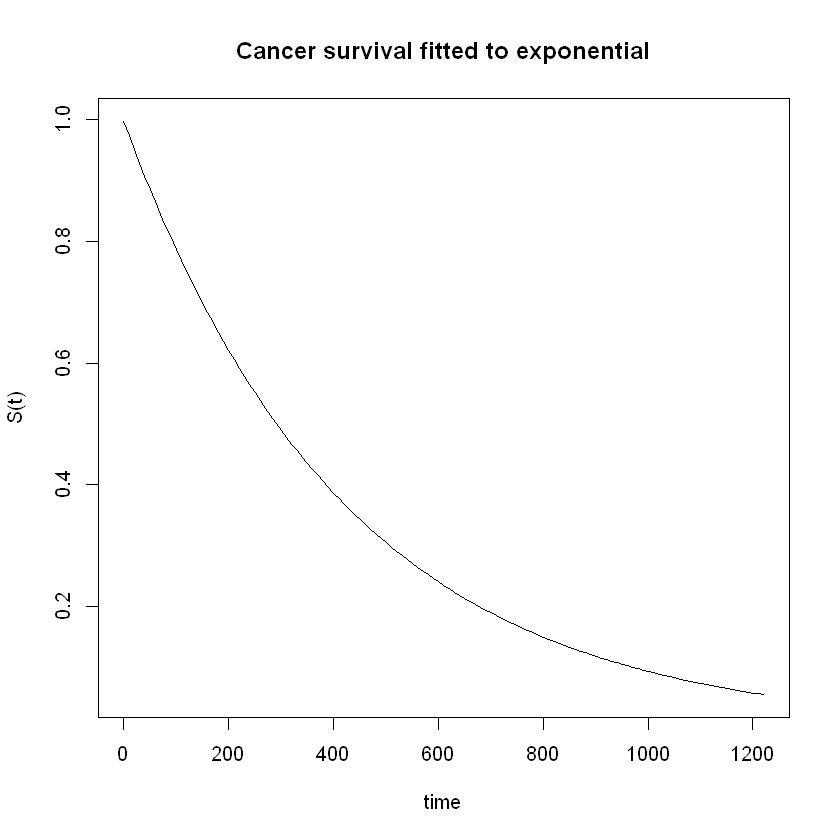

In [17]:
#plot S(t)=exp(-lambda*t)
time<-seq(1,max(ovarian$futime),10)

s.t <- function(t){
  s<-exp(-l*t)
  return(s)
}
pdf('rendus/cancer-exponential-fit.pdf')
plot(time,s.t(time),xlab="time",ylab="S(t)",
     type="l",main="Cancer survival fitted to exponential")
dev.off()
plot(time,s.t(time),xlab="time",ylab="S(t)",
     type="l",main="Cancer survival fitted to exponential")

Q3. Which is the probability of survival on day 30? (1 pt)

In [18]:
s.t(30)

(Intercept) 
  0.9313428

Q4. Does the loglikelihood change a lot if you use a Weibull distribution to model the process?
Since the Weibull probability distribution function has 2 parameters, what can you conclude
from the comparison of the likelihood obtained with the two models? (2 pt)

In [22]:
#fit to Weibull
S.w <- survreg(Surv(time,status)~1,data=cancer,dist="weibull")
summary(S.w)


Call:
survreg(formula = Surv(time, status) ~ 1, data = cancer, dist = "weibull")
              Value Std. Error      z      p
(Intercept)  6.0349     0.0591 102.05 <2e-16
Log(scale)  -0.2752     0.0624  -4.41  1e-05

Scale= 0.759 

Weibull distribution
Loglik(model)= -1153.9   Loglik(intercept only)= -1153.9
Number of Newton-Raphson Iterations: 6 
n= 228 


Doesnt change a lot. Having 2 parameters is too much.

Q5. Compare the S(t) functions obtained for the cancer dataset using the exponential and the non
parametric model. Save the resulting plot as Cancer-fit-comparison.pdf and upload it to Moodle.
Comment here on the two curves. (2 pt)

(Intercept) 
0.002370928

png 
  2

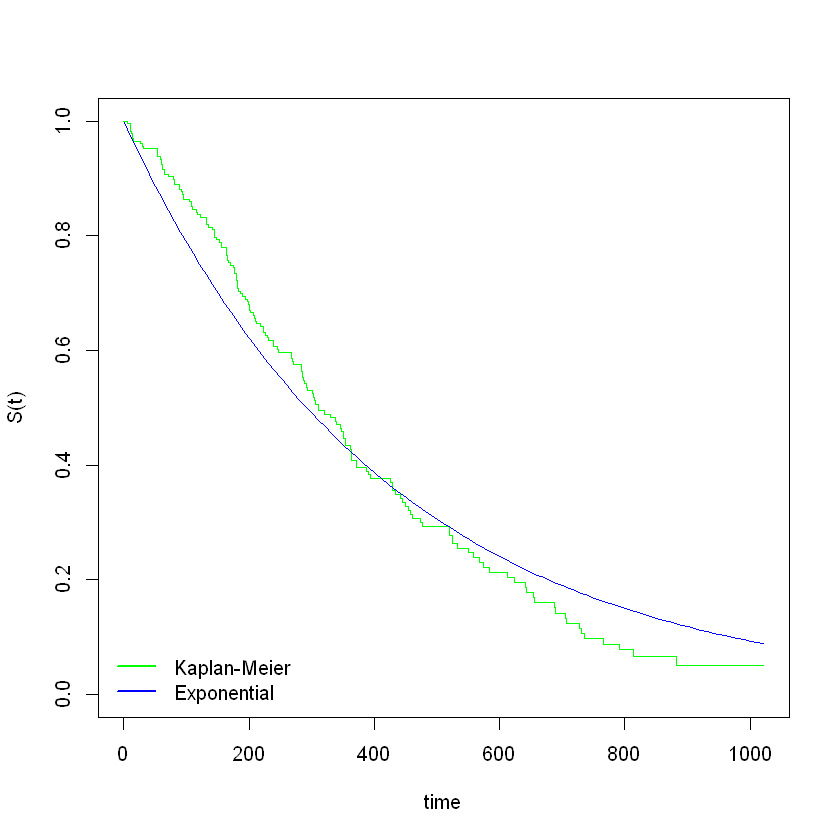

In [26]:
surv <- Surv(cancer$time,cancer$status)

#Kaplan-Meier estimator of S(t)
SF<-survfit(surv~1)

#use of an exponential model (we get the log-likelihood function)
S.e <- survreg(surv~1,dist="exponential")


#estimation of lambda
l<-1/exp(S.e$coefficients)
l
time<-seq(1,max(cancer$time),10)

s.t <- function(t){
  s<-exp(-l*t)
  return(s)
}

#plot S(t)
pdf('rendus/cancer-fit-comparison.pdf')
plot(SF,xlab="time",ylab="S(t)",col="green",conf.int="none")
lines(time,s.t(time),col="blue")
legend(x="bottomleft",legend=c("Kaplan-Meier","Exponential"),
       lwd=2,bty="n",col=c("green","blue"))
dev.off()
plot(SF,xlab="time",ylab="S(t)",col="green",conf.int="none")
lines(time,s.t(time),col="blue")
legend(x="bottomleft",legend=c("Kaplan-Meier","Exponential"),
       lwd=2,bty="n",col=c("green","blue"))

Q6. Compare the S(t) functions obtained for the lung dataset using the exponential, the Weibull
and the non parametric models. Save the resulting plot as Lung-fit-comparison.pdf and upload
it to Moodle. Comment here on the results. (2 pt)


Call:
survreg(formula = surv ~ 1, dist = "weibull")
              Value Std. Error      z      p
(Intercept)  6.0349     0.0591 102.05 <2e-16
Log(scale)  -0.2752     0.0624  -4.41  1e-05

Scale= 0.759 

Weibull distribution
Loglik(model)= -1153.9   Loglik(intercept only)= -1153.9
Number of Newton-Raphson Iterations: 6 
n= 228 


(Intercept) 
0.002370928

png 
  2

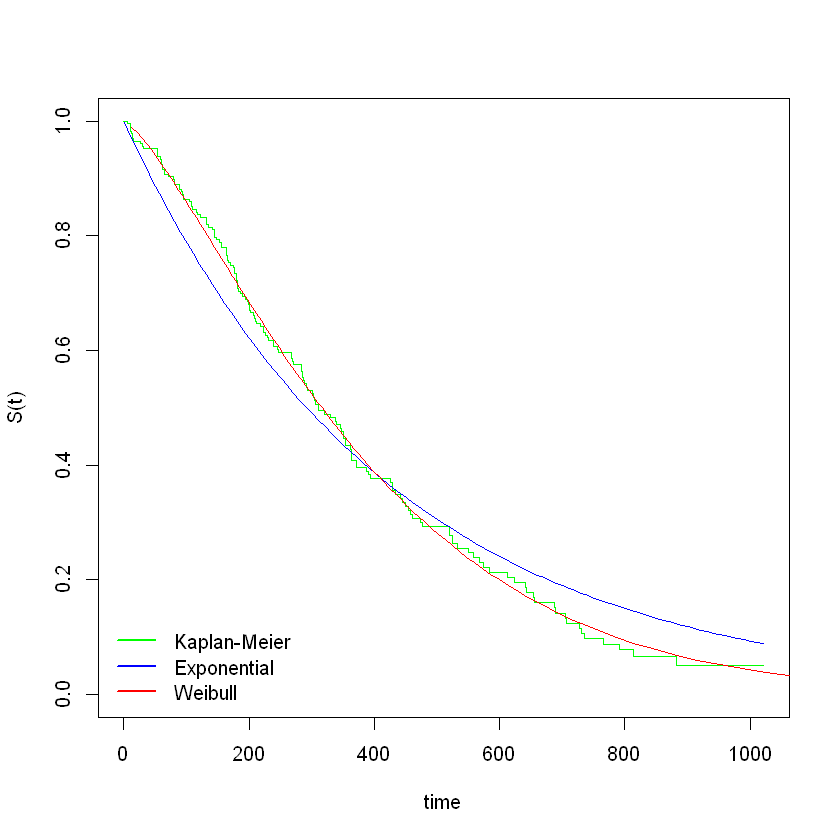

In [34]:
# same as cancer actually....
surv <- Surv(lung$time,lung$status)

#fit to Weibull
S.w <- survreg(surv~1,dist="weibull")
summary(S.w)

#Kaplan-Meier estimator of S(t)
SF<-survfit(surv~1)

#use of an exponential model (we get the log-likelihood function)
S.e <- survreg(surv~1,dist="exponential")


#estimation of lambda
l<-1/exp(S.e$coefficients)
l
time<-seq(1,max(cancer$time),10)

s.t <- function(t){
  s<-exp(-l*t)
  return(s)
}

#plot S(t)
plotst <- function(){
    plot(SF,xlab="time",ylab="S(t)",col="green",conf.int="none")
    lines(time,s.t(time),col="blue")
    lines(x = predict(S.w, type = "quantile", p = seq(0.01, 0.99, by=.01))[1,],
         y = rev(seq(0.01, 0.99, by = 0.01)),col = "red")
    legend(x="bottomleft",legend=c("Kaplan-Meier","Exponential","Weibull"),
           lwd=2,bty="n",col=c("green","blue","red"))
}

pdf('rendus/lung-fit-comparison.pdf')
plotst()
dev.off()
plotst()



## Cox Model

In [41]:
?ovarian

ovarian                package:survival                R Documentation

_O_v_a_r_i_a_n _C_a_n_c_e_r _S_u_r_v_i_v_a_l _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Survival in a randomised trial comparing two treatments for
     ovarian cancer

_U_s_a_g_e:

     ovarian
     
_F_o_r_m_a_t:

       futime:    survival or censoring time                           
       fustat:    censoring status                                     
       age:       in years                                             
       resid.ds:  residual disease present (1=no,2=yes)                
       rx:        treatment group                                      
       ecog.ps:   ECOG performance status (1 is better, see reference) 
      
_S_o_u_r_c_e:

     Terry Therneau

_R_e_f_e_r_e_n_c_e_s:

     Edmunson, J.H., Fleming, T.R., Decker, D.G., Malkasian, G.D.,
     Jefferies, J.A., Webb, M.J., and Kvols, L.K., Different
     Chemotherapeutic Sensitivities and Host Factors Affecting
     Prognosis in Advanced Ovarian Carcinoma vs. Minimal Residual
     Disease.  Cancer Treatment Reports, 63:241-47, 1979.

In [42]:
summary(ovarian)

     futime           fustat            age           resid.ds    
 Min.   :  59.0   Min.   :0.0000   Min.   :38.89   Min.   :1.000  
 1st Qu.: 368.0   1st Qu.:0.0000   1st Qu.:50.17   1st Qu.:1.000  
 Median : 476.0   Median :0.0000   Median :56.85   Median :2.000  
 Mean   : 599.5   Mean   :0.4615   Mean   :56.17   Mean   :1.577  
 3rd Qu.: 794.8   3rd Qu.:1.0000   3rd Qu.:62.38   3rd Qu.:2.000  
 Max.   :1227.0   Max.   :1.0000   Max.   :74.50   Max.   :2.000  
       rx         ecog.ps     
 Min.   :1.0   Min.   :1.000  
 1st Qu.:1.0   1st Qu.:1.000  
 Median :1.5   Median :1.000  
 Mean   :1.5   Mean   :1.462  
 3rd Qu.:2.0   3rd Qu.:2.000  
 Max.   :2.0   Max.   :2.000  

In [36]:
#Cox model
S.cox <- coxph(Surv(futime,fustat)~rx,data=ovarian)
summary(S.cox)

Call:
coxph(formula = Surv(futime, fustat) ~ rx, data = ovarian)

  n= 26, number of events= 12 

      coef exp(coef) se(coef)      z Pr(>|z|)
rx -0.5964    0.5508   0.5870 -1.016     0.31

   exp(coef) exp(-coef) lower .95 upper .95
rx    0.5508      1.816    0.1743      1.74

Concordance= 0.608  (se = 0.07 )
Likelihood ratio test= 1.05  on 1 df,   p=0.3
Wald test            = 1.03  on 1 df,   p=0.3
Score (logrank) test = 1.06  on 1 df,   p=0.3


Q7. Use the ovarian dataset to build a Cox model using the ECOG performance status of the individuals
as a covariate. In the light of the above reported summary description, discuss on the
influence of this covariable on the survival of the patients. (2 pt)

In [40]:
S.cox.ecog<- coxph(Surv(futime,fustat)~ecog.ps,data=ovarian)
summary(S.cox.ecog)

Call:
coxph(formula = Surv(futime, fustat) ~ ecog.ps, data = ovarian)

  n= 26, number of events= 12 

          coef exp(coef) se(coef)     z Pr(>|z|)
ecog.ps 0.3984    1.4894   0.5864 0.679    0.497

        exp(coef) exp(-coef) lower .95 upper .95
ecog.ps     1.489     0.6714    0.4719       4.7

Concordance= 0.521  (se = 0.078 )
Likelihood ratio test= 0.47  on 1 df,   p=0.5
Wald test            = 0.46  on 1 df,   p=0.5
Score (logrank) test = 0.47  on 1 df,   p=0.5


Multiple cox covariates :

In [44]:
?cancer

lung                 package:survival                  R Documentation

_N_C_C_T_G _L_u_n_g _C_a_n_c_e_r _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Survival in patients with advanced lung cancer from the North
     Central Cancer Treatment Group.  Performance scores rate how well
     the patient can perform usual daily activities.

_U_s_a_g_e:

     lung
     cancer
     
_F_o_r_m_a_t:

       inst:       Institution code                                                
       time:       Survival time in days                                           
       status:     censoring status 1=censored, 2=dead                             
       age:        Age in years                                                    
       sex:        Male=1 Female=2                                                 
       ph.ecog:    ECOG performance score (0=good 5=dead)                          
       ph.karno:   Karnofsky performance score (bad=0-good=100) rated by physician 
       pat.karno:  Karnofsky performance score as rated by patient                 
       meal.cal:   Calories consumed at meals                                      
       wt.loss:    Weight loss in last six months                                  
      
_N_o_t_e:

     The use of 1/2 for alive/dead instead of the usual 0/1 is a
     historical footnote.  For data contained on punch cards, IBM 360
     Fortran treated blank as a zero, which led to a policy within the
     section of Biostatistics to never use "0" as a data value since
     one could not distinguish it from a missing value.  The policy
     became a habit, as is often the case; and the 1/2 coding endured
     long beyond the demise of punch cards and Fortran.

_S_o_u_r_c_e:

     Terry Therneau

_R_e_f_e_r_e_n_c_e_s:

     Loprinzi CL. Laurie JA. Wieand HS. Krook JE. Novotny PJ.  Kugler
     JW. Bartel J. Law M. Bateman M. Klatt NE. et al.  Prospective
     evaluation of prognostic variables from patient-completed
     questionnaires. North Central Cancer Treatment Group.  Journal of
     Clinical Oncology. 12(3):601-7, 1994.

In [43]:
S.cox <- coxph(Surv(time,status)~age+sex+ph.ecog,data=lung)
summary(S.cox)

Call:
coxph(formula = Surv(time, status) ~ age + sex + ph.ecog, data = lung)

  n= 227, number of events= 164 
   (1 observation deleted due to missingness)

             coef exp(coef)  se(coef)      z Pr(>|z|)    
age      0.011067  1.011128  0.009267  1.194 0.232416    
sex     -0.552612  0.575445  0.167739 -3.294 0.000986 ***
ph.ecog  0.463728  1.589991  0.113577  4.083 4.45e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

        exp(coef) exp(-coef) lower .95 upper .95
age        1.0111     0.9890    0.9929    1.0297
sex        0.5754     1.7378    0.4142    0.7994
ph.ecog    1.5900     0.6289    1.2727    1.9864

Concordance= 0.637  (se = 0.025 )
Likelihood ratio test= 30.5  on 3 df,   p=1e-06
Wald test            = 29.93  on 3 df,   p=1e-06
Score (logrank) test = 30.5  on 3 df,   p=1e-06


Q8. Investigate the role played by sex, age, the ECOG performance score, the Karnofsky performance
score rated by the physician and the Karnofsky performance score as rated by patient
in the survival of the patients whose data are reported in the cancer dataset. Paste here the
resulting summary and discuss on the results. (3 pt)

In [47]:
S.cox <- coxph(Surv(time,status)~sex+age+ph.ecog+ph.karno+pat.karno, data = lung)
summary(S.cox)

Call:
coxph(formula = Surv(time, status) ~ sex + age + ph.ecog + ph.karno + 
    pat.karno, data = lung)

  n= 223, number of events= 160 
   (5 observations deleted due to missingness)

               coef exp(coef)  se(coef)      z Pr(>|z|)   
sex       -0.561464  0.570373  0.170689 -3.289  0.00100 **
age        0.011383  1.011448  0.009510  1.197  0.23134   
ph.ecog    0.565533  1.760386  0.186716  3.029  0.00245 **
ph.karno   0.015853  1.015979  0.009853  1.609  0.10762   
pat.karno -0.010111  0.989940  0.006881 -1.470  0.14169   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          exp(coef) exp(-coef) lower .95 upper .95
sex          0.5704     1.7532    0.4082     0.797
age          1.0114     0.9887    0.9928     1.030
ph.ecog      1.7604     0.5681    1.2209     2.538
ph.karno     1.0160     0.9843    0.9965     1.036
pat.karno    0.9899     1.0102    0.9767     1.003

Concordance= 0.647  (se = 0.025 )
Likelihood ratio test= 32.9  on 5 df,   p=4e-06
Wa

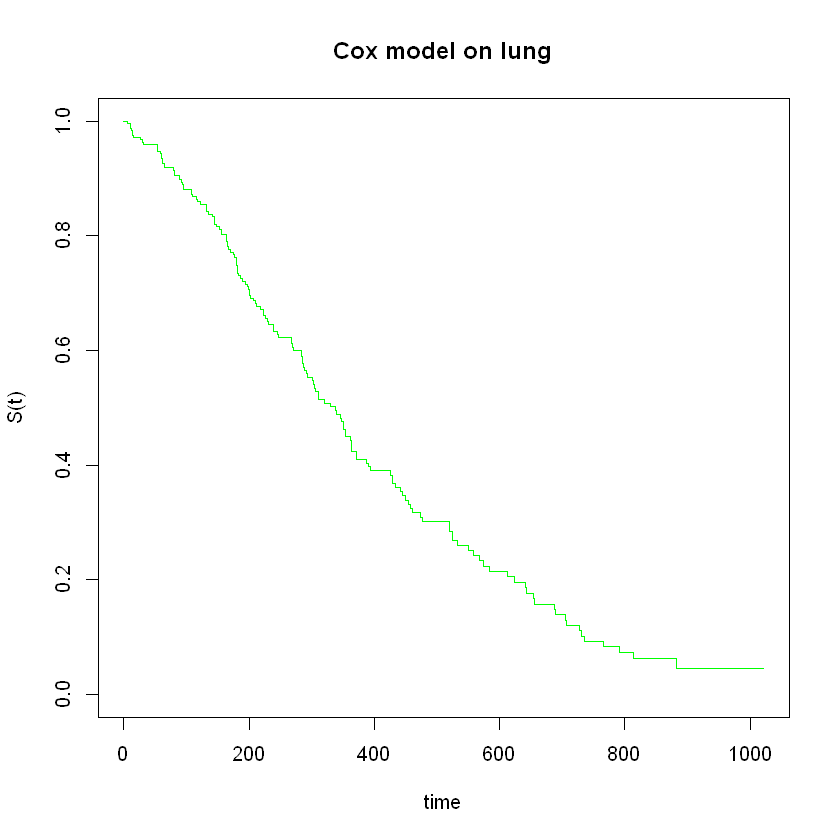

In [48]:
plot(survfit(S.cox), col = "green",conf.int="none", 
     xlab="time",ylab="S(t)",main="Cox model on lung")

Q9. Create independent plots of the S(t) as a function of time for the cancer dataset considering
initially only the sex and age as coviariables and then include also the the ECOG performance
score, the Karnofsky performance score rated by the physician and the Karnofsky performance
score as rated by patient. Save the two plots as Cancer-Cox-2cov.pdf and Cancer-Cox-4cov.pdf
and upload them to Moodle. (2 pt)

In [50]:
# 4 cov = previous plot
pdf('rendus/cancer-cox-4cov.pdf')
plot(survfit(S.cox), col = "green",conf.int="none", 
     xlab="time",ylab="S(t)",main="Cox model on lung, 4 cov")
dev.off()

# 2 cov
S.cox2 <- coxph(Surv(time,status)~sex+age, data = lung)
summary(S.cox2)
pdf('rendus/cancer-cox-2cov.pdf')
plot(survfit(S.cox2), col = "green",conf.int="none", 
     xlab="time",ylab="S(t)",main="Cox model on lung, 2 cov")
dev.off()

png 
  2

Call:
coxph(formula = Surv(time, status) ~ sex + age, data = lung)

  n= 228, number of events= 165 

         coef exp(coef)  se(coef)      z Pr(>|z|)   
sex -0.513219  0.598566  0.167458 -3.065  0.00218 **
age  0.017045  1.017191  0.009223  1.848  0.06459 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

    exp(coef) exp(-coef) lower .95 upper .95
sex    0.5986     1.6707    0.4311    0.8311
age    1.0172     0.9831    0.9990    1.0357

Concordance= 0.603  (se = 0.025 )
Likelihood ratio test= 14.12  on 2 df,   p=9e-04
Wald test            = 13.47  on 2 df,   p=0.001
Score (logrank) test = 13.72  on 2 df,   p=0.001


png 
  2

Q10. Consider the kidney database. Describe here the dataset, verify which covariables are significant
(detail them here) within the Cox model and use them to create the plot of the S(t) as a function
of time saving it as kidney.pdf and upload it to Moodle. (3 pt)

In [52]:
?kidney

kidney                package:survival                 R Documentation

_K_i_d_n_e_y _c_a_t_h_e_t_e_r _d_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Data on the recurrence times to infection, at the point of
     insertion of the catheter, for kidney patients using portable
     dialysis equipment.  Catheters may be removed for reasons other
     than infection, in which case the observation is censored.  Each
     patient has exactly 2 observations.

     This data has often been used to illustrate the use of random
     effects (frailty) in a survival model.  However, one of the males
     (id 21) is a large outlier, with much longer survival than his
     peers.  If this observation is removed no evidence remains for a
     random subject effect.

_F_o_r_m_a_t:

       patient:  id                                        
       time:     time                                      
       status:   event status                              
       age:      in years                                  
       sex:      1=male, 2=female                          
       disease:  disease type (0=GN, 1=AN, 2=PKD, 3=Other) 
       frail:    frailty estimate from original paper      
      
_N_o_t_e:

     The original paper ignored the issue of tied times and so is not
     exactly reproduced by the survival package.

_S_o_u_r_c_e:

     CA McGilchrist, CW Aisbett (1991), Regression with frailty in
     survival analysis.  _Biometrics_ *47*, 461-66.

_E_x_a_m_p_l_e_s:

     kfit <- coxph(Surv(time, status)~ age + sex + disease + frailty(id), kidney)
     kfit0 <- coxph(Surv(time, status)~ age + sex + disease, kidney)
     kfitm1 <- coxph(Surv(time,status) ~ age + sex + disease + 
                     frailty(id, dist='gauss'), kidney)

In [55]:
k.cox <- coxph(Surv(time,status)~age+sex+disease+frail, data = kidney)
summary(k.cox)

Call:
coxph(formula = Surv(time, status) ~ age + sex + disease + frail, 
    data = kidney)

  n= 76, number of events= 58 

                coef exp(coef)  se(coef)      z Pr(>|z|)    
age         0.007714  1.007744  0.011907  0.648 0.517055    
sex        -2.099844  0.122475  0.392654 -5.348 8.90e-08 ***
diseaseGN   0.130666  1.139587  0.436114  0.300 0.764471    
diseaseAN   0.640906  1.898200  0.447886  1.431 0.152442    
diseasePKD -2.168515  0.114347  0.648825 -3.342 0.000831 ***
frail       1.791873  6.000682  0.257639  6.955 3.53e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

           exp(coef) exp(-coef) lower .95 upper .95
age           1.0077     0.9923   0.98450    1.0315
sex           0.1225     8.1649   0.05673    0.2644
diseaseGN     1.1396     0.8775   0.48476    2.6790
diseaseAN     1.8982     0.5268   0.78904    4.5665
diseasePKD    0.1143     8.7453   0.03206    0.4079
frail         6.0007     0.1666   3.62158    9.9427

Concordance= 0.

In [56]:
k.cox.sig <- coxph(Surv(time,status)~sex+disease+frail, data = kidney)
summary(k.cox.sig)

Call:
coxph(formula = Surv(time, status) ~ sex + disease + frail, data = kidney)

  n= 76, number of events= 58 

              coef exp(coef) se(coef)      z Pr(>|z|)    
sex        -2.0785    0.1251   0.3887 -5.347 8.92e-08 ***
diseaseGN   0.2758    1.3176   0.3712  0.743 0.457531    
diseaseAN   0.8210    2.2728   0.3563  2.304 0.021223 *  
diseasePKD -1.9581    0.1411   0.5600 -3.496 0.000472 ***
frail       1.7858    5.9645   0.2573  6.940 3.91e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

           exp(coef) exp(-coef) lower .95 upper .95
sex           0.1251     7.9921   0.05841     0.268
diseaseGN     1.3176     0.7590   0.63647     2.728
diseaseAN     2.2728     0.4400   1.13043     4.570
diseasePKD    0.1411     7.0860   0.04709     0.423
frail         5.9645     0.1677   3.60205     9.876

Concordance= 0.82  (se = 0.03 )
Likelihood ratio test= 68.28  on 5 df,   p=2e-13
Wald test            = 59.76  on 5 df,   p=1e-11
Score (logrank) test = 85.6

png 
  2

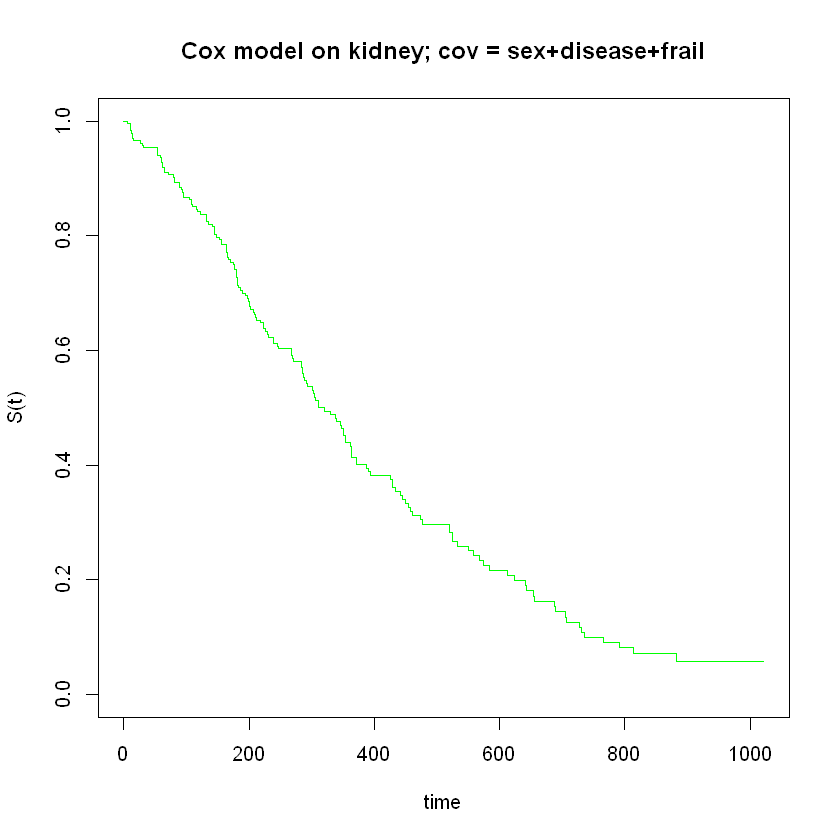

In [59]:
pdf('rendus/kidney.pdf')
plot(survfit(S.cox2), col = "green",conf.int="none", 
     xlab="time",ylab="S(t)",main="Cox model on kidney; cov = sex+disease+frail")
dev.off()
plot(survfit(S.cox2), col = "green",conf.int="none", 
     xlab="time",ylab="S(t)",main="Cox model on kidney; cov = sex+disease+frail")